In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_img/macron.jpg')
img.shape

(682, 1024, 3)

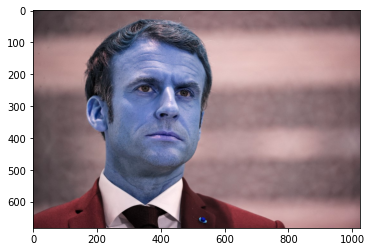

In [3]:
plt.imshow(img)

In [57]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(type(gray))
gray.shape

<class 'numpy.ndarray'>


(688, 688)

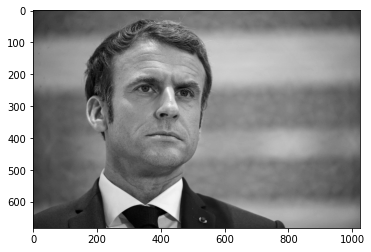

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

In [7]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

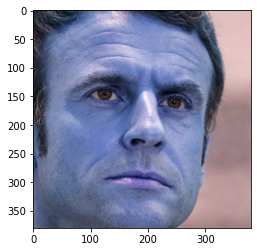

In [8]:
cropped_img = get_cropped_image_if_2_eyes('./test_img/macron.jpg')
plt.imshow(cropped_img)

In [9]:
path_to_data = '.\datasets\\'
path_to_crpd_data = '.\\datasets\\A_cropped\\' 

In [10]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [11]:
img_dirs

['.\\datasets\\A_cropped',
 '.\\datasets\\Bolsonaro',
 '.\\datasets\\joe_biden',
 '.\\datasets\\justin_trudeau',
 '.\\datasets\\kim_jong',
 '.\\datasets\\macron',
 '.\\datasets\\modi',
 '.\\datasets\\naftali_bennett',
 '.\\datasets\\putin',
 '.\\datasets\\trump',
 '.\\datasets\\xi_jinping']

In [12]:
import shutil
if os.path.exists(path_to_crpd_data):
     shutil.rmtree(path_to_crpd_data)
os.mkdir(path_to_crpd_data)

In [13]:
cropped_image_dirs = []
Leaders_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    leaders_name = img_dir.split('\\')[-1]    # will give the last element of the list
    Leaders_file_names_dict[leaders_name] = []
    
    for entry in os.scandir(img_dir):    # it will go through each of the images from that folder
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_crpd_data + leaders_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped image In folder", cropped_folder)
                
            cropped_file_name = leaders_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            Leaders_file_names_dict[leaders_name].append(cropped_file_path)
            count += 1
            

Generating cropped image In folder .\datasets\A_cropped\Bolsonaro
Generating cropped image In folder .\datasets\A_cropped\joe_biden
Generating cropped image In folder .\datasets\A_cropped\justin_trudeau
Generating cropped image In folder .\datasets\A_cropped\kim_jong
Generating cropped image In folder .\datasets\A_cropped\macron
Generating cropped image In folder .\datasets\A_cropped\modi
Generating cropped image In folder .\datasets\A_cropped\naftali_bennett
Generating cropped image In folder .\datasets\A_cropped\putin
Generating cropped image In folder .\datasets\A_cropped\trump
Generating cropped image In folder .\datasets\A_cropped\xi_jinping


### Now you should have cropped folder under datasets folder that contains cropped images
Manually examine cropped folder and delete any unwanted images

In [114]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('\\')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Bolsonaro': ['.\\datasets\\A_cropped\\Bolsonaro\\Bolsonaro1.png',
  '.\\datasets\\A_cropped\\Bolsonaro\\Bolsonaro10.png',
  '.\\datasets\\A_cropped\\Bolsonaro\\Bolsonaro11.png',
  '.\\datasets\\A_cropped\\Bolsonaro\\Bolsonaro12.png',
  '.\\datasets\\A_cropped\\Bolsonaro\\Bolsonaro13.png',
  '.\\datasets\\A_cropped\\Bolsonaro\\Bolsonaro14.png',
  '.\\datasets\\A_cropped\\Bolsonaro\\Bolsonaro15.png',
  '.\\datasets\\A_cropped\\Bolsonaro\\Bolsonaro16.png',
  '.\\datasets\\A_cropped\\Bolsonaro\\Bolsonaro17.png',
  '.\\datasets\\A_cropped\\Bolsonaro\\Bolsonaro18.png',
  '.\\datasets\\A_cropped\\Bolsonaro\\Bolsonaro19.png',
  '.\\datasets\\A_cropped\\Bolsonaro\\Bolsonaro2.png',
  '.\\datasets\\A_cropped\\Bolsonaro\\Bolsonaro20.png',
  '.\\datasets\\A_cropped\\Bolsonaro\\Bolsonaro21.png',
  '.\\datasets\\A_cropped\\Bolsonaro\\Bolsonaro22.png',
  '.\\datasets\\A_cropped\\Bolsonaro\\Bolsonaro23.png',
  '.\\datasets\\A_cropped\\Bolsonaro\\Bolsonaro24.png',
  '.\\datasets\\A_cropped\\Bolsonaro\

In [119]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Bolsonaro': 0,
 'joe_biden': 1,
 'justin_trudeau': 2,
 'kim_jong': 3,
 'macron': 4,
 'modi': 5,
 'naftali_bennett': 6,
 'putin': 7,
 'trump': 8,
 'xi_jinping': 9}

In [120]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

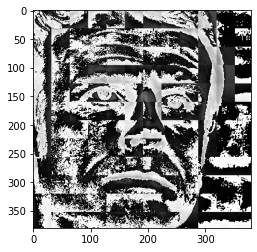

In [121]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [122]:
Leaders_file_names_dict

{'A_cropped': [],
 'Bolsonaro': ['.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro1.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro2.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro3.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro4.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro5.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro6.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro7.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro8.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro9.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro10.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro11.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro12.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro13.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro14.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro15.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro16.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro17.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolson

In [123]:
X = []
y = []

for leaders_name, training_files in Leaders_file_names_dict.items(): #iterate through leaders and files
    for training_image in training_files:   # iterate through all the training files
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32)) 
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1))) # vertically stacking them
        X.append(combined_img)
        y.append(class_dict[leaders_name])
        
        
        

In [124]:
len(X[0])

4096

In [125]:
X[0]

array([[ 69],
       [ 85],
       [152],
       ...,
       [  4],
       [  0],
       [  0]], dtype=uint8)

In [126]:
X = np.array(X).reshape(len(X),4096).astype(float) # converted to float otherwise sklearn will give to much warning
X.shape

(529, 4096)

In [127]:
X[0]

array([ 69.,  85., 152., ...,   4.,   0.,   0.])

### Data cleaning process is done. Now we are ready to train our model

##### We will use SVM with rbf kernel tuned with heuristic finetuning

In [128]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
print(type(X_train))

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

<class 'numpy.ndarray'>


0.6390977443609023

In [131]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71        14
           1       0.43      0.23      0.30        13
           2       1.00      0.79      0.88        19
           3       0.64      0.70      0.67        20
           4       0.34      0.83      0.49        12
           5       1.00      1.00      1.00        11
           6       0.50      0.33      0.40        15
           7       0.62      0.59      0.61        17
           8       1.00      0.50      0.67         4
           9       1.00      0.50      0.67         8

    accuracy                           0.64       133
   macro avg       0.72      0.63      0.64       133
weighted avg       0.69      0.64      0.64       133



##### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [132]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [133]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [134]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.803165,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.527911,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.755095,{'logisticregression__C': 1}


In [135]:
best_estimators["svm"].score(X_test, y_test)

0.7744360902255639

In [136]:
best_estimators["random_forest"].score(X_test, y_test)

0.47368421052631576

In [137]:
best_estimators["logistic_regression"].score(X_test, y_test)

0.706766917293233

In [138]:
best_clf = best_estimators['svm']

In [139]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))  #confusion_matrix
cm

array([[12,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 1,  7,  0,  0,  2,  0,  0,  1,  2,  0],
       [ 0,  0, 16,  1,  2,  0,  0,  0,  0,  0],
       [ 1,  0,  0, 18,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  8,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 11,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  1,  0, 11,  0,  0,  0],
       [ 1,  1,  0,  0,  1,  0,  2, 12,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  2,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  6]], dtype=int64)

Text(69.0, 0.5, 'Truth')

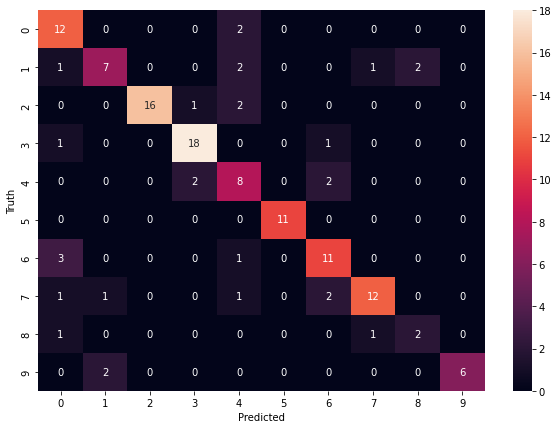

In [141]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [142]:
class_dict

{'Bolsonaro': 0,
 'joe_biden': 1,
 'justin_trudeau': 2,
 'kim_jong': 3,
 'macron': 4,
 'modi': 5,
 'naftali_bennett': 6,
 'putin': 7,
 'trump': 8,
 'xi_jinping': 9}

In [143]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [144]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))